## 🏦 Lending Club Loan Defaulters Prediction

### 📑 Introduction
<br>
LendingClub is a U.S.–based peer‑to‑peer lending company headquartered in San Francisco, California. It was the first peer‑to‑peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC) and to enable loan trading on a secondary market. Today, LendingClub is recognized as the world’s largest peer‑to‑peer lending platform.

Working through this case study will help us understand how real‑world business problems are approached using exploratory data analysis (EDA) and machine learning. It will also provide a foundational understanding of risk analytics in banking and financial services, and demonstrate how data can be leveraged to reduce the risk of financial loss when lending to customers.

### 📝 Business Understanding
<br>
In the lending industry, one of the most critical challenges is striking the right balance between approving more loans to grow revenue and minimizing exposure to bad debt. Each loan default results in significant financial loss, while overly strict approval policies lead to missed opportunities and reduced customer acquisition. This project addresses that trade‑off by building a machine learning model to predict loan defaults and providing an interactive policy simulator. Decision makers can adjust approval thresholds and instantly see the impact on default rates, cost of errors, and overall portfolio performance—supporting data‑driven strategies to optimize risk management and profitability.

### 🎯 Business Objectives
<br>
✅ Minimize financial losses by accurately identifying high‑risk (defaulting) borrowers.

✅ Reduce opportunity costs by avoiding unnecessary rejection of creditworthy customers.

✅ Provide a simulation tool (Streamlit dashboard) to adjust decision thresholds and cost assumptions in real time.

✅ Quantify business impact through metrics such as default rate, total cost, and net ROI.

✅ Support data‑driven decisions for credit policy optimization and improved portfolio profitability.

### 📌 Data Dictionary
<br>

| Column Name | Description |
|-------------|-------------|
| `loan_amnt` | The listed amount of the loan applied for by the borrower. If reduced by credit department, reflected here. |
| `term` | The number of payments on the loan in months (36 or 60). |
| `int_rate` | Interest rate on the loan. |
| `installment` | The monthly payment owed by the borrower if the loan originates. |
| `grade` | LendingClub assigned loan grade. |
| `sub_grade` | LendingClub assigned loan sub-grade. |
| `emp_title` | The job title supplied by the borrower when applying. |
| `emp_length` | Employment length in years (0 = less than 1 year, 10 = ten or more years). |
| `home_ownership` | Home ownership status (RENT, OWN, MORTGAGE, OTHER). |
| `annual_inc` | Self-reported annual income. |
| `verification_status` | Indicates if income was verified, not verified, or source verified. |
| `issue_d` | The month when the loan was funded. |
| `loan_status` | Current status of the loan. |
| `purpose` | A category provided by the borrower for the loan request. |
| `title` | The loan title provided by the borrower. |
| `zip_code` | First 3 digits of the borrower’s zip code. |
| `addr_state` | State provided by the borrower in the loan application. |
| `dti` | Debt-to-income ratio (monthly debt payments divided by monthly income). |
| `earliest_cr_line` | The month the borrower’s earliest reported credit line was opened. |
| `open_acc` | Number of open credit lines in the borrower’s credit file. |
| `pub_rec` | Number of derogatory public records. |
| `revol_bal` | Total credit revolving balance. |
| `revol_util` | Revolving line utilization rate (used credit vs total available). |
| `total_acc` | Total number of credit lines in the borrower’s credit file. |
| `initial_list_status` | Initial listing status of the loan (`W` or `F`). |
| `application_type` | Indicates whether the loan is individual or joint application. |
| `mort_acc` | Number of mortgage accounts. |
| `pub_rec_bankruptcies` | Number of public record bankruptcies. |


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

df = pd.read_csv("C:/Users/User/Loan-Default-Prediction/data/lending_club_loan_two.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [2]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00
mean,14113.89,13.64,431.85,74203.18,17.38,11.31,0.18,15844.54,53.79,25.41,1.81,0.12
std,8357.44,4.47,250.73,61637.62,18.02,5.14,0.53,20591.84,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


- It is interesting to note that, there is a loan amount of 500 approved, let's check this df out to understand if it is an anomaly or not
- Not only that, for dti (debt-to-income ratio) values being 9999 for maximum does not really make sense, if very less rows, let's remove it

In [3]:
five = df[df["loan_amnt"] == 500]
five

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
25312,500.00,36 months,10.71,16.31,B,B5,NaN,< 1 year,MORTGAGE,7904.04,Not Verified,Jan-2008,Fully Paid,vacation,go on vacation in 08,3.04,Feb-1989,3.00,0.00,44.00,3.70,6.00,f,INDIVIDUAL,NaN,NaN,"076 Gould Crescent Suite 698\r\nRossside, KY 2..."
97433,500.00,36 months,10.46,16.25,B,B5,THe University of Illinois,3 years,MORTGAGE,26000.00,Not Verified,Jan-2008,Fully Paid,small_business,Financing for business,14.17,Jul-1994,8.00,0.00,5643.00,60.70,28.00,f,INDIVIDUAL,NaN,NaN,"74942 Erin Springs Apt. 140\r\nHaynesfort, TX ..."
183896,500.00,36 months,11.41,16.47,C,C3,Global Travel International -and- Global Domai...,< 1 year,RENT,19500.00,Not Verified,Jan-2008,Fully Paid,other,A's2Zee's,3.69,Nov-1983,8.00,1.00,12229.00,90.60,15.00,f,INDIVIDUAL,NaN,NaN,"6228 Eric Islands Suite 519\r\nChungborough, A..."
355879,500.00,36 months,9.76,16.08,B,B2,"Hughes, Hubbard & Reed LLP",7 years,MORTGAGE,59000.00,Not Verified,Mar-2008,Fully Paid,other,Store Charge Card,22.17,Aug-1995,9.00,0.00,65414.00,47.80,26.00,f,INDIVIDUAL,NaN,0.00,"1848 Thomas Road Apt. 916\r\nNew Catherine, FL..."


This rows can be removed because, their annual income is really high and hence, a loan amount of 500 dollars would be unnecessary 

In [4]:
df = df[df["loan_amnt"] != 500]

In [5]:
df["loan_status"] = df["loan_status"].map({"Fully Paid" : 0 , 'Charged Off': 1})

In [6]:
# We can remove the columns below due to high cardinality and low information power for predicting loan defaults

df= df.drop(columns=["emp_title" , "title" , "address",
                     "sub_grade" , "initial_list_status",          # subset of grade
                     "issue_d" , "earliest_cr_line"])              # these are leaky columns because at the time of prediction
                                                                   # these information are not available, and can fail in real-world deployment

<Axes: >

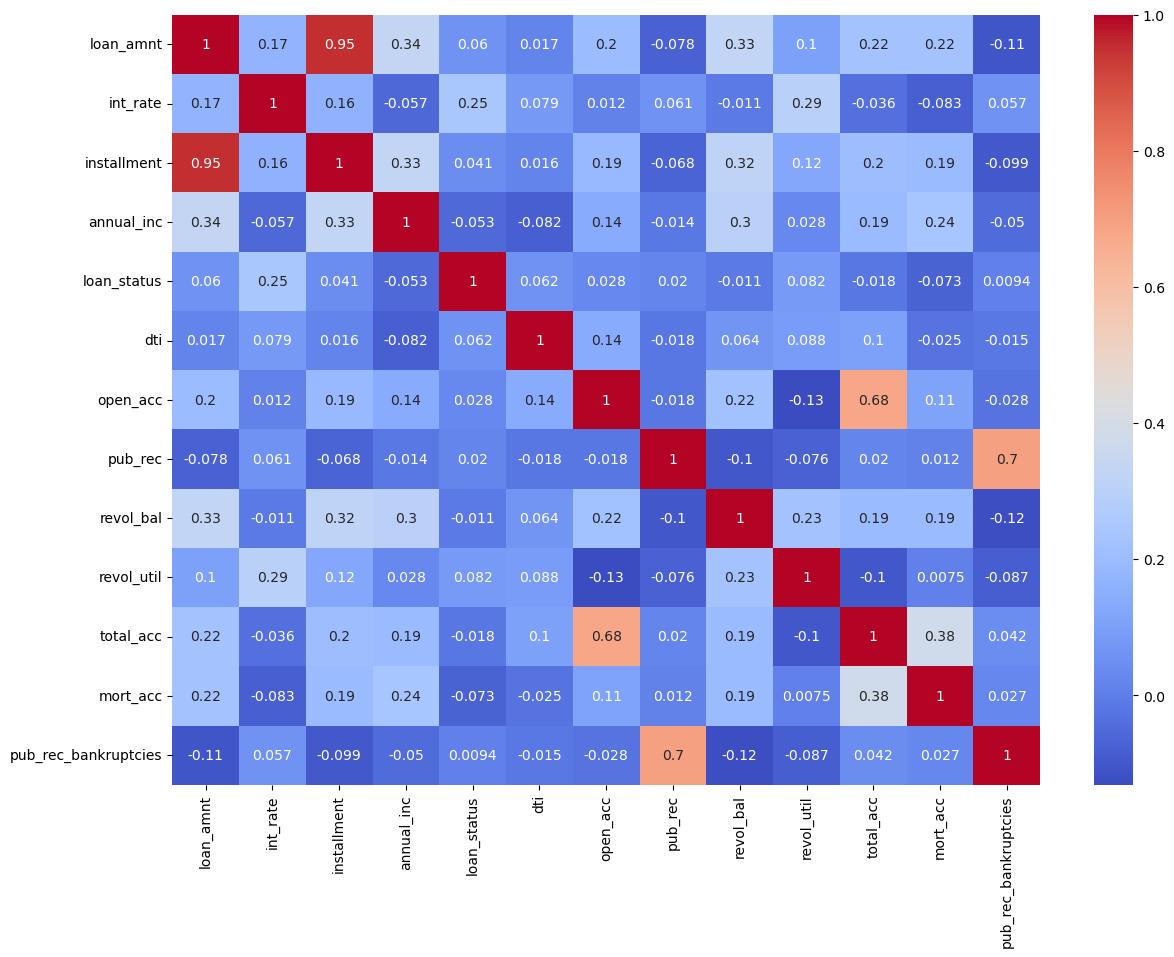

In [7]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

1. Strong correlation between loan amount and installments (0.95), as expected because higher loan amounts will lead to higher installments.
<br>
<br>
2. pub_rec and pub_rec_bankrupties strong positive correlation (0.70), as bankruptcies are a subset of public records, can consider dropping one in the future for model performance.
<br>
<br>
3. open_acc and total_acc have strong positive correlation as well (0.68), makes sense as open accounts are a portion of total accounts.
<br>
<br>
4. revol_bal and loan amount (0.33) and installment (0.32) , moderate postive correlation as this could indicate that borrowers with higher credit card balance tend to take larger loan amounts, leading to high monthly installments.
<br>
<br>
5. int_rate and loan_status (0.25), only predictor meaningful to target variable as other variables exhibit wweak correlation. Higher interest rates, could likely mean higher defaults as well.

### Exploratory Data Analysis 🔬

Text(0.5, 1.0, 'Loan Status Counts')

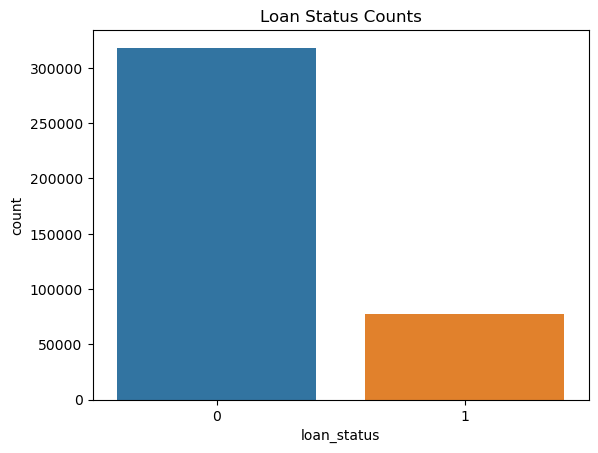

In [8]:
sns.countplot(data=df , x="loan_status")
plt.title("Loan Status Counts")

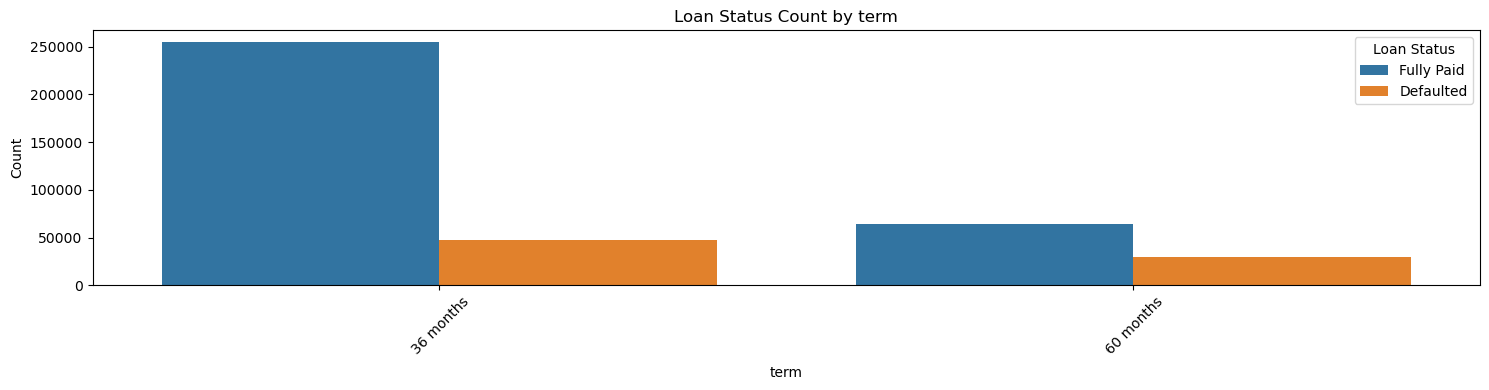

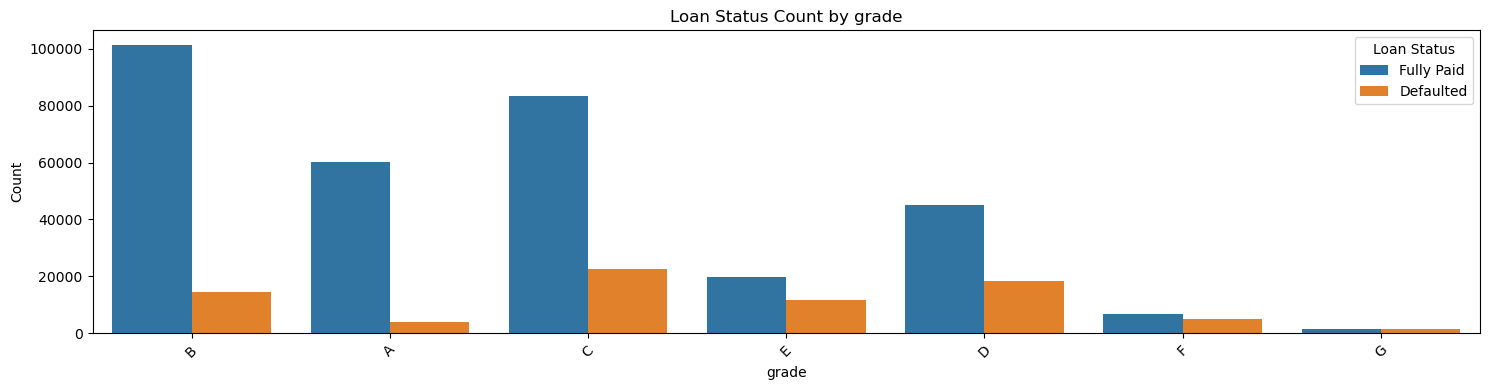

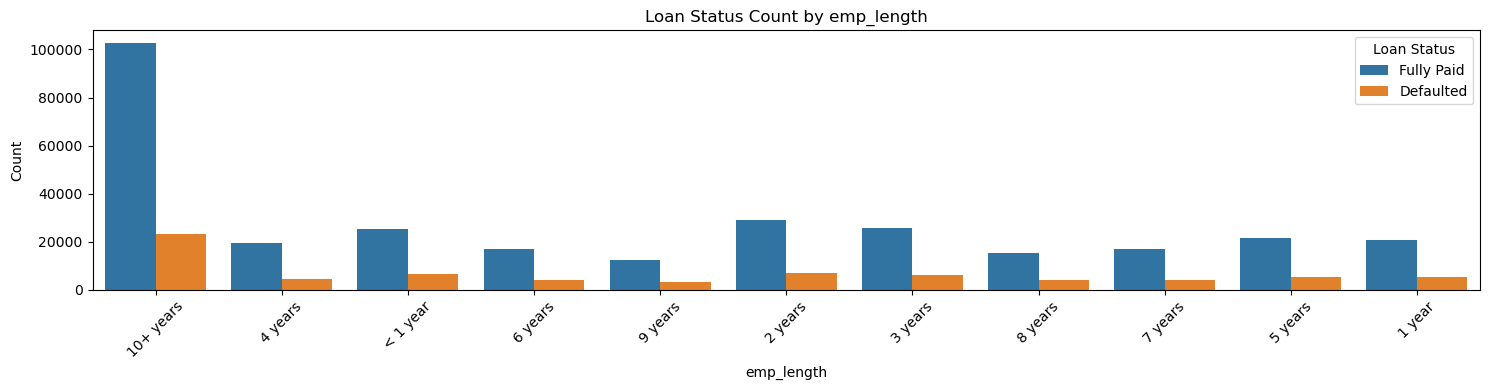

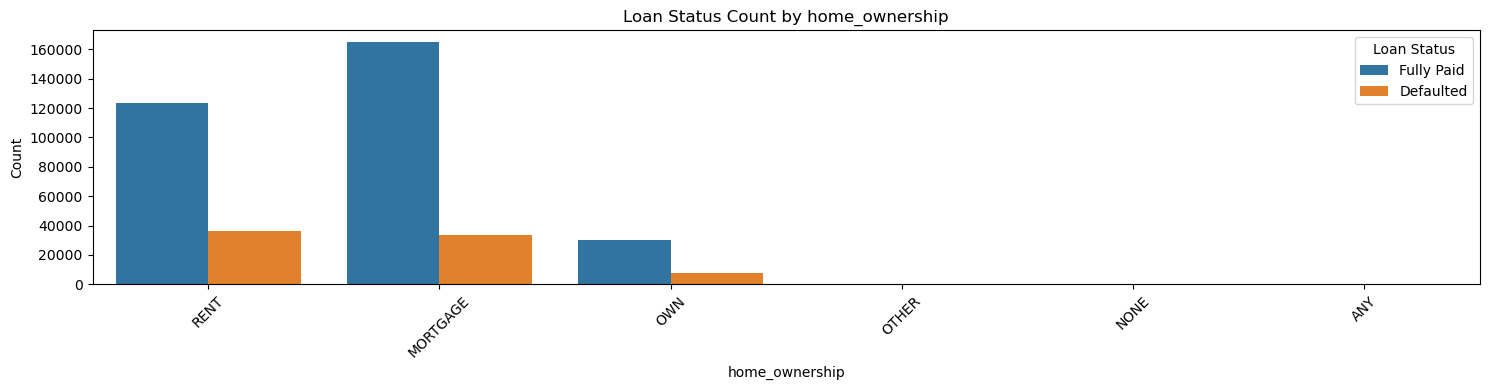

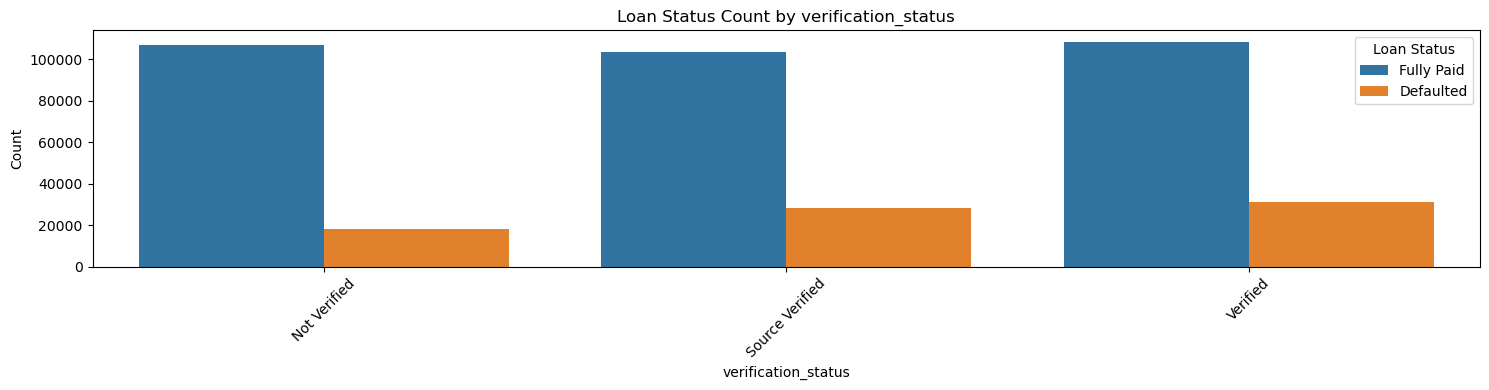

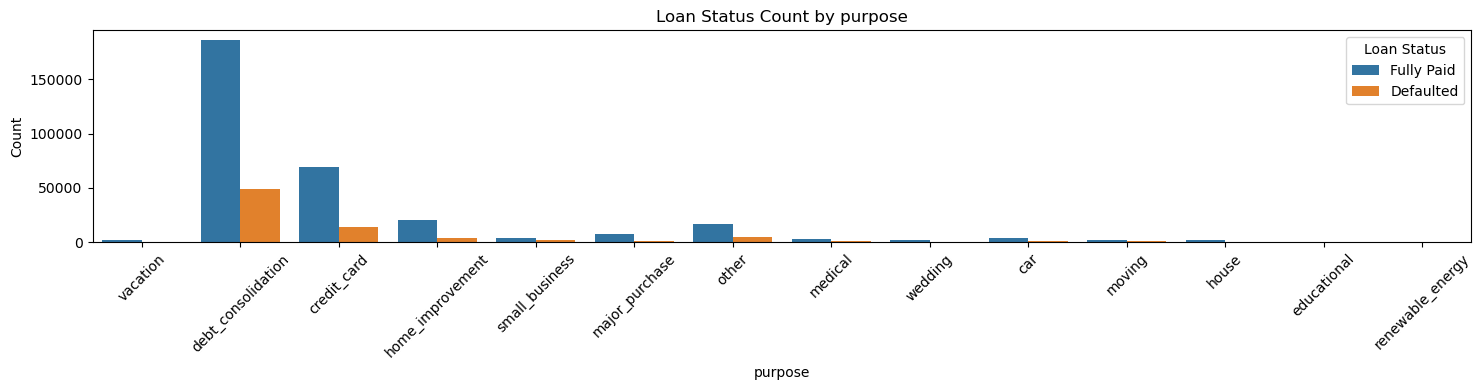

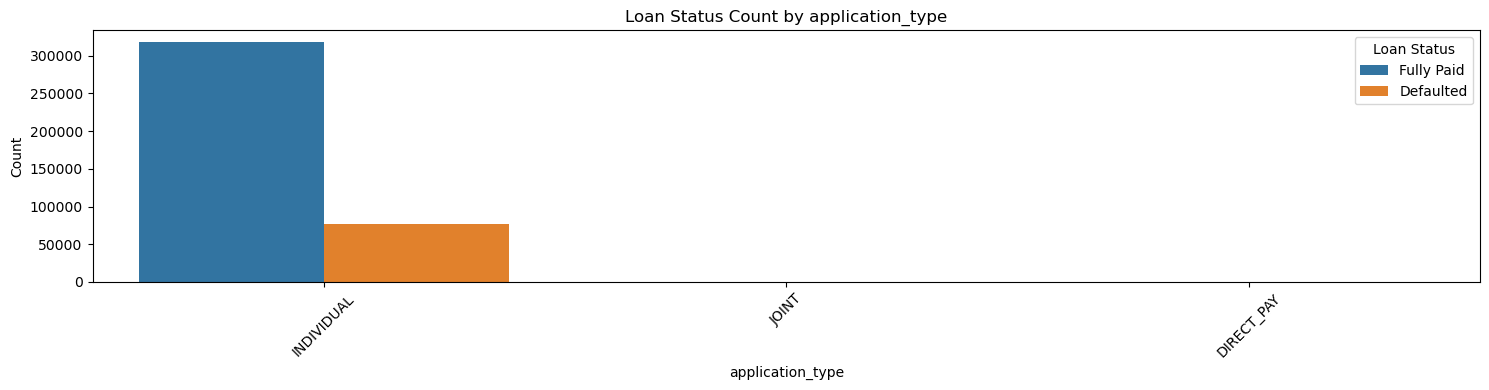

In [9]:
categorical_cols = df.select_dtypes(include="object")

for col in categorical_cols.columns:
    plt.figure(figsize=(15,4))
    sns.countplot(x=col, hue="loan_status" , data=df)
    plt.title(f"Loan Status Count by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Loan Status", labels=["Fully Paid", "Defaulted"])
    plt.tight_layout()
    plt.show()

- Although verified income categories show higher default counts, this may reflect that riskier applicants are more likely to be verified—not that verification itself increases risk. This suggests verification is used as a risk management tool, not a guarantee of repayment.
<br>
<br>
- Borrowers who Rent or have a Mortgage are the majority, making them key target segments for analysis. 
<br>
<br>
- Debt consolidation and credit card payments are the main purposes of loan application which makes sense in the real world scenario. They tend to go hand-in-hand as well.
<br>
<br>
https://capbay.com/what-exactly-are-default-and-how-should-we-react-to-them/#:~:text=Circumstances%20that%20may%20cause%20defaults,make%20repayments%20for%20any%20reasons.
<br>
<br>
- All applications are on an individual basis application

Boxplot analysis to detect outliers and understand distributions 🧰

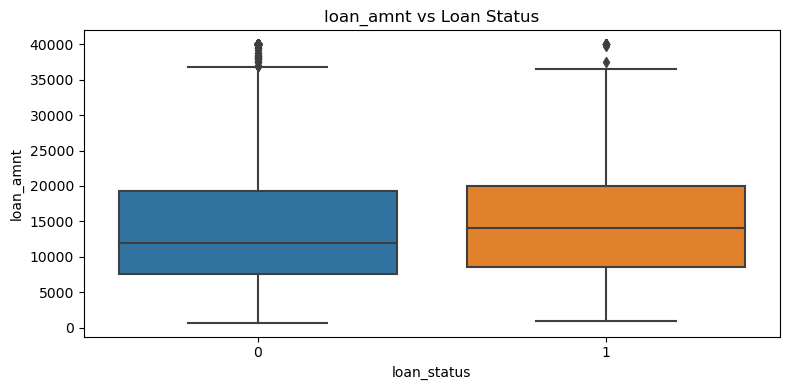

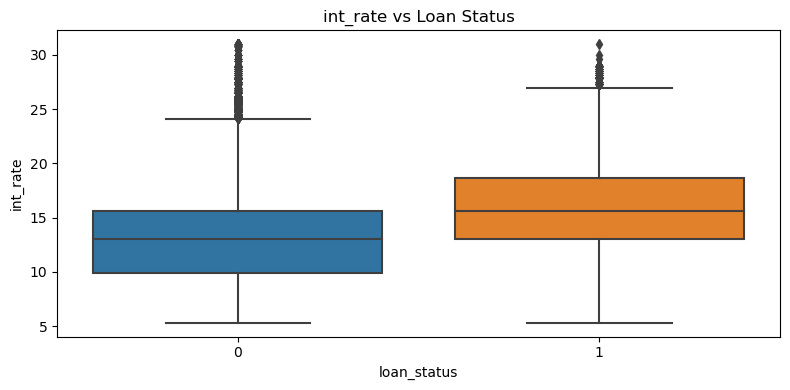

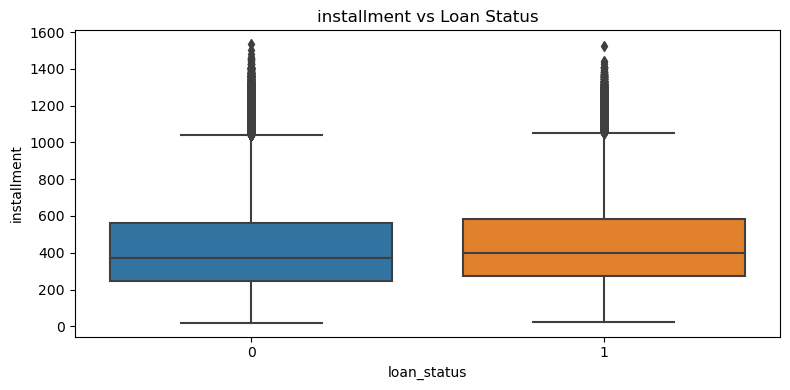

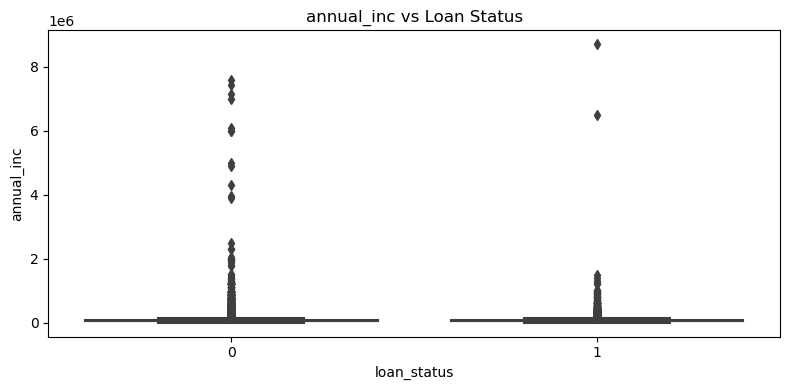

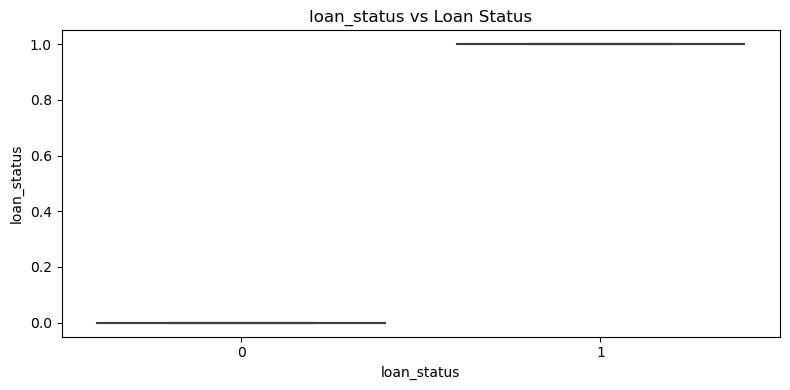

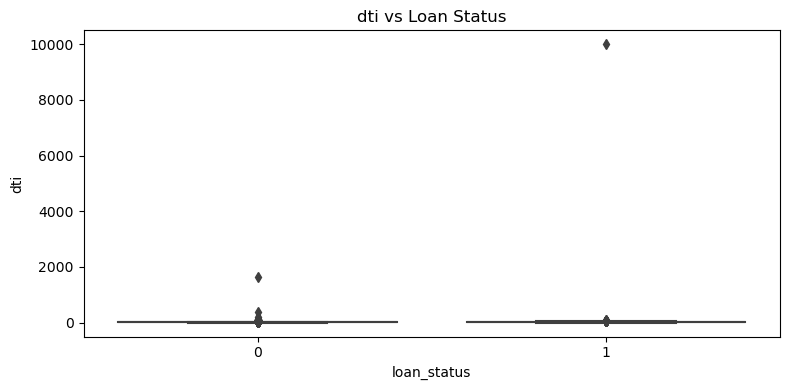

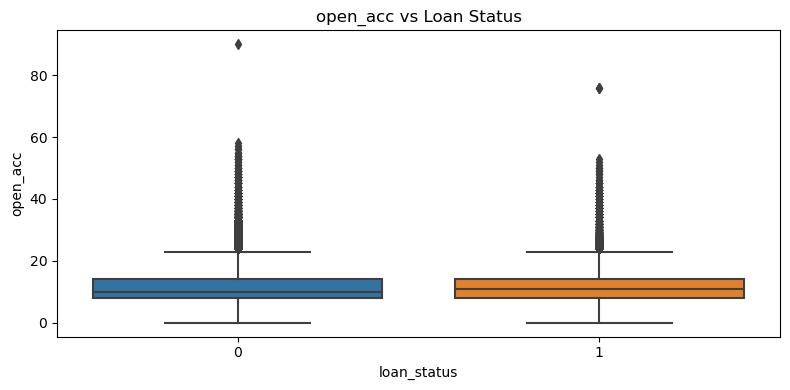

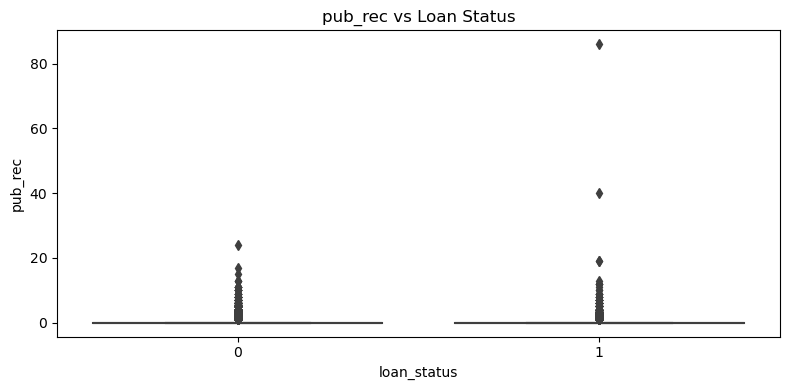

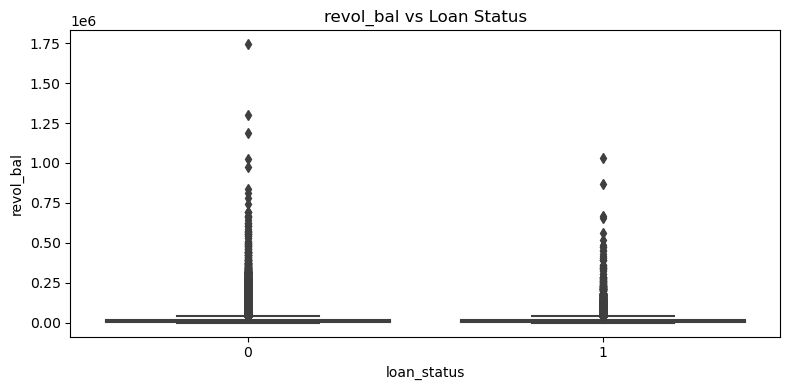

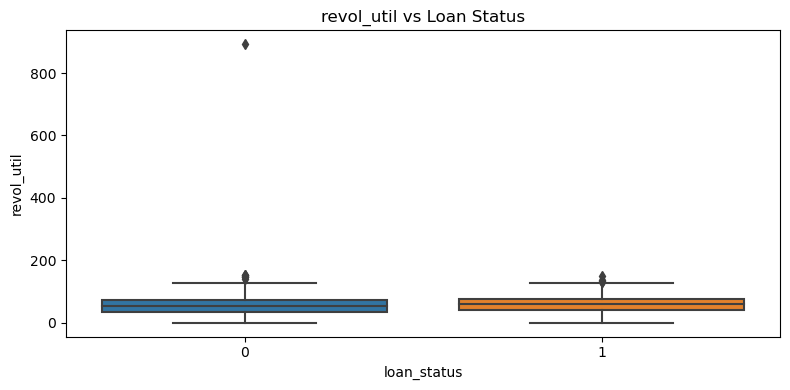

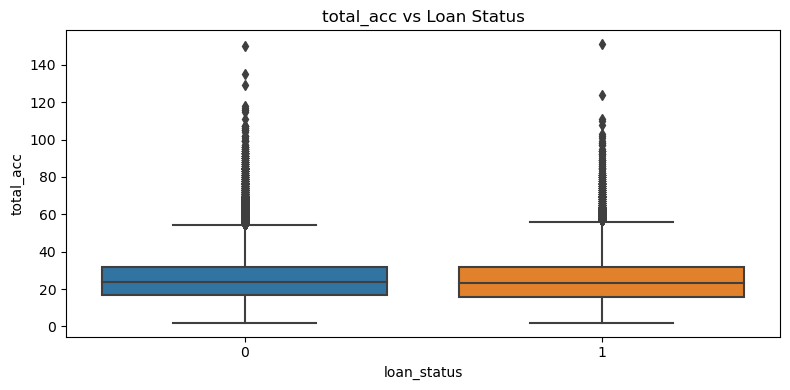

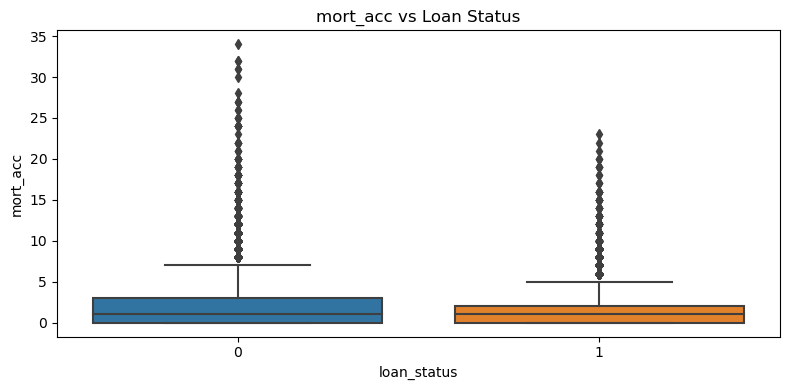

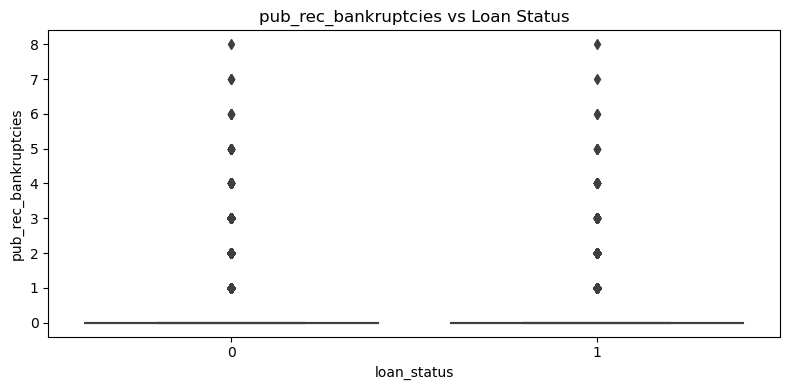

In [10]:
# NUMERICAL COLUMNS ANALYSIS

numerical_cols = df.select_dtypes(include="number")

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df["loan_status"], y=df[col])
    plt.title(f"{col} vs Loan Status")
    plt.tight_layout()
    plt.show()



- Most features on their own provide minimal information on the differences between defaulters and non-defaulters, as their averages are similar.  
<br>
<br>
- However, for features such as Loan Amount, Loan Term, Interest Rate, Installments, and Open Accounts: 
<br>
<br>
- On average, higher Loan Amounts lead to more defaults, and this makes sense if proper money management is absent. 💸  
<br>
<br>
- Longer-term loans (60 months) are more likely to default ❌, whereas shorter-term loans (36 months) are more likely to be repaid successfully. ✅  
<br>
<br>
- Interest rates of 15% and higher may cause borrowers to default. 📈  
<br>
<br>
- On average, slightly higher loan installments cause borrowers to default around $400. However, there are plenty of outliers in non‑defaulters where the installments are really high but still fully paid. Hence, using Loan Installments to determine loan defaults is not enough.  
<br>
<br>
- As the grade assigned by LC decreases, the default counts are higher as well. This makes sense because a lower grade means higher‑risk loans. 🚨  
<br>
<br>
- We will also keep some outliers for model generalizability, as these outliers can reflect real‑world scenarios.  


### Hypothesis analysis or common assumptions analysis for further key insights

1. Higher interest rates leads to more defaults
2. Loan for small business defaults the most as usually small business owners do not have much upfront capital
3. Lower loan application grade, leads to more loan defaults
4. Renters will default more than home owners and mortgage payers.
5. Default rates will decrease with increasing annual income
6. High DTI , leads to more defaults

In [11]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies
0,10000.00,36 months,11.44,329.48,B,10+ years,RENT,117000.00,Not Verified,0,vacation,26.24,16.00,0.00,36369.00,41.80,25.00,INDIVIDUAL,0.00,0.00
1,8000.00,36 months,11.99,265.68,B,4 years,MORTGAGE,65000.00,Not Verified,0,debt_consolidation,22.05,17.00,0.00,20131.00,53.30,27.00,INDIVIDUAL,3.00,0.00
2,15600.00,36 months,10.49,506.97,B,< 1 year,RENT,43057.00,Source Verified,0,credit_card,12.79,13.00,0.00,11987.00,92.20,26.00,INDIVIDUAL,0.00,0.00


Text(0.5, 1.0, 'Default Rate by Interest Rate')

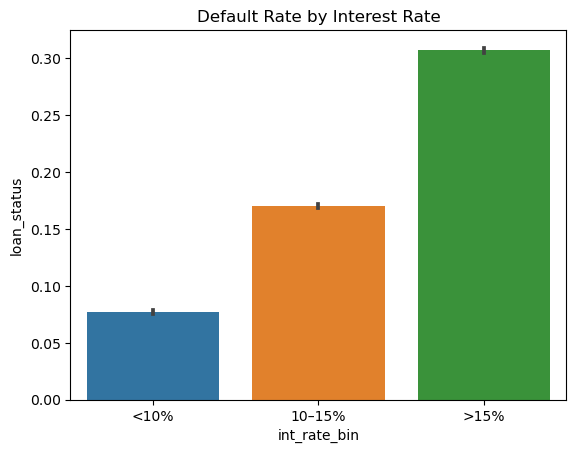

In [12]:
# Interest rate vs defaults

df['int_rate_bin'] = pd.cut(df['int_rate'], bins=[0, 10, 15, 30], labels=['<10%', '10–15%', '>15%'])
sns.barplot(x='int_rate_bin', y='loan_status', data=df)
plt.title("Default Rate by Interest Rate")


✅ Borrowers with interest rates above 15% defaulted at a rate of 30%, compared to only approximately 7% for those below 10%. This supports the hypothesis that riskier borrowers, assigned higher interest rates, are more likely to default.

Text(0.5, 1.0, 'Default Rate by Loan Purpose')

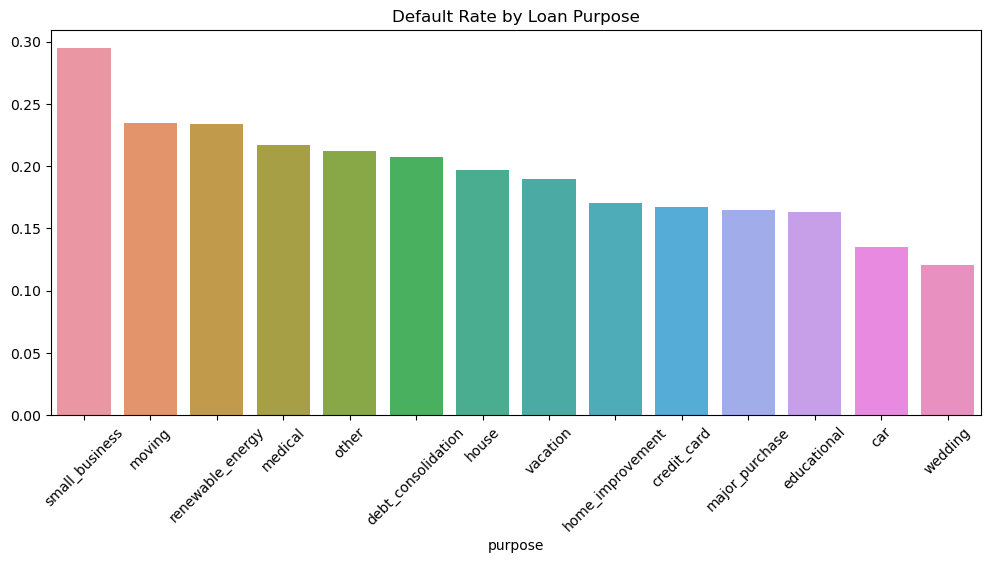

In [13]:
# Loan Purpose vs Defaults
purpose_df = df.groupby("purpose")["loan_status"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=purpose_df.index, y=purpose_df.values)
plt.xticks(rotation=45)
plt.title("Default Rate by Loan Purpose")

🕴️ Loans taken for small business, moving, renewable_energy and medical purposes show default rates of over 20%, compared to less than 15% for categories like car and wedding loans. This highlights the increased risk associated with certain loan purposes.

Text(0.5, 1.0, 'Default Rate by Loan Grade')

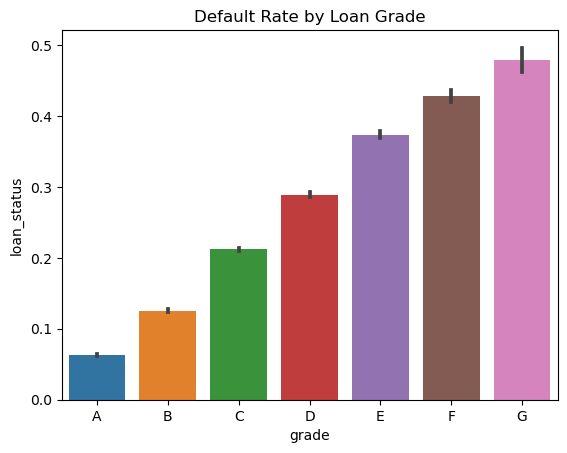

In [14]:
# Grade vs loan defaaults

sns.barplot(x='grade', y='loan_status', data=df, order=sorted(df['grade'].unique()))
plt.title("Default Rate by Loan Grade")


✅ As suspected, the lower the grade of the loan application, the default rate is higher. This suggests that LC grade assignment of loans can be trusted 

Text(0.5, 1.0, 'Default Rate by Home Ownership')

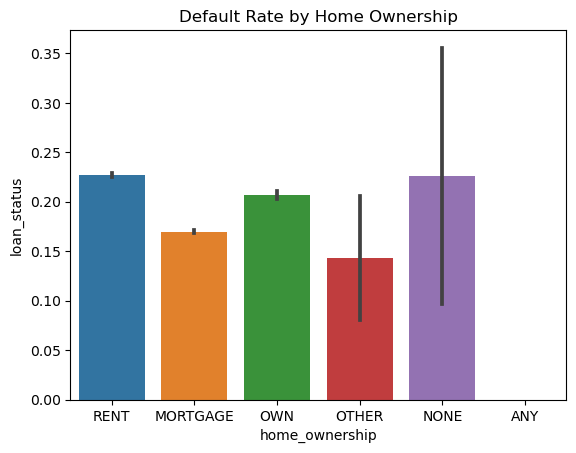

In [15]:
# Home ownership vs loan defaults

sns.barplot(x='home_ownership', y='loan_status', data=df)
plt.title("Default Rate by Home Ownership")


Text(0.5, 1.0, 'Default Rate by Income Bracket')

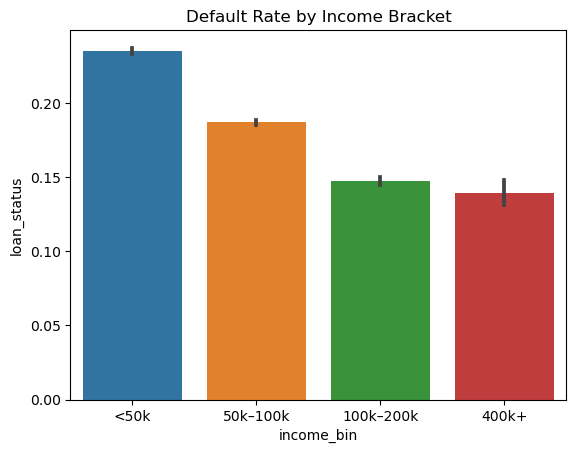

In [16]:
# Annual income vs Loan Defaults 

df['income_bin'] = pd.cut(df['annual_inc'], bins=[0, 50000, 100000, 200000, 400000], 
                          labels=['<50k', '50k–100k', '100k–200k', '400k+'])
sns.barplot(x='income_bin', y='loan_status', data=df)
plt.title("Default Rate by Income Bracket")


Default rates decline with increasing income. Borrowers earning under $50,000/year defaulted at nearly 25%, while those earning over $400,000/year had rates below 15% — indicating income is a strong indicator of creditworthiness.

Text(0.5, 1.0, 'Default Rate by DTI')

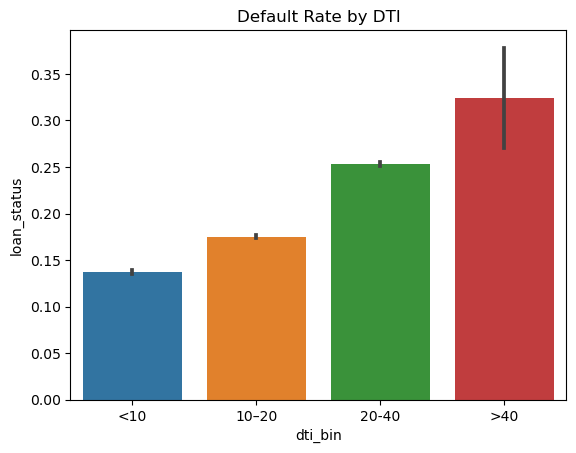

In [17]:
# DTI vs loan defaults

df['dti_bin'] = pd.cut(df['dti'], bins=[0, 10, 20, 40, df["dti"].max()], labels=['<10', '10–20', '20-40' , '>40'])
sns.barplot(x='dti_bin', y='loan_status', data=df)
plt.title("Default Rate by DTI")

Borrowers with DTI > 40 showed a default rate of over 30%, versus only around 14% for those with DTI below 10. This confirms the hypothesis that high debt burdens increase the chance of default.

In [18]:
df = df.drop(columns=["int_rate_bin" , "income_bin" , "dti_bin"])

### 🧹 Data Cleaning and Preprocessing

In [19]:
# Only retaining the integers (months)
df['term'] = df['term'].str.strip().str.replace(' months', '', regex=False).astype(int)

# ordinal encoding
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
df['grade'] = df['grade'].map({g: i for i, g in enumerate(grade_order)})

# We only want integers 
df['emp_length'] = df['emp_length'].str.replace(' years', '', regex=False)
df['emp_length'] = df['emp_length'].str.replace(' year', '', regex=False)
df['emp_length'] = df['emp_length'].str.replace('< 1', '0', regex=False)
df['emp_length'] = df['emp_length'].str.replace('10+', '10', regex=False)
df['emp_length'] = df['emp_length'].astype(float)

In [20]:
# Handling Missing Values

df["emp_length"].fillna(df["emp_length"].mode()[0] , inplace=True)
df["revol_util"].fillna(df["revol_util"].mean() , inplace=True)
df["mort_acc"].fillna(df["mort_acc"].median() , inplace=True)
df["pub_rec_bankruptcies"].fillna(df["pub_rec_bankruptcies"].median() , inplace=True)

df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

In [21]:
# 🔍 Outlier check

inc_check = df['annual_inc'].quantile([0.01, 0.99])
dti_check = df['dti'].quantile([0.01, 0.99])
open_check = df['open_acc'].quantile([0.01, 0.99])
total_acc = df['total_acc'].quantile([0.01, 0.99])
util = df['revol_util'].quantile([0.01, 0.99])
bal = df['revol_bal'].quantile([0.01, 0.99])

print(inc_check)
print()
print(dti_check)
print()
print(open_check)
print()
print(total_acc)
print()
print(util)
print()
print(bal)

0.01    19000.00
0.99   250000.00
Name: annual_inc, dtype: float64

0.01    1.56
0.99   36.43
Name: dti, dtype: float64

0.01    3.00
0.99   27.00
Name: open_acc, dtype: float64

0.01    6.00
0.99   60.00
Name: total_acc, dtype: float64

0.01    1.02
0.99   98.00
Name: revol_util, dtype: float64

0.01     154.00
0.99   86040.50
Name: revol_bal, dtype: float64


In [22]:
df = df[df['annual_inc'] <= 300000]   # extra $50,000 for more generalizability
# df["annual_inc"] = np.log(df["annual_inc"]) # log-transform for fairer distribution
df = df[df['dti'] <= 50]              # Debt-to-Income Ratio
df =  df[df['dti'] <= 40]
df =  df[df['dti'] <= 50]
df =  df[df['dti'] <= 50]
df =  df[df['dti'] <= 50]
df.shape

(393912, 20)

In [23]:
# One hot encoding
transformed_df = pd.get_dummies(df, columns=['home_ownership', 'verification_status', 'purpose', 'application_type'], drop_first=True)

In [24]:
# Cleaned data before one hot encoding
# df.to_excel('cleaned_data_before_onehotEncoding.xlsx', index=False) 
# print("DataFrame exported to 'cleaned_data_before_onehotEncoding.xlsx'")

In [25]:
#one hot encoding
transformed_df = pd.get_dummies(df, columns=['home_ownership', 'verification_status', 'purpose', 'application_type'], drop_first=True)

In [26]:
transformed_df.head(3)

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT
0,10000.00,36,11.44,329.48,1,10.00,117000.00,0,26.24,16.00,0.00,36369.00,41.80,25.00,0.00,0.00,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,8000.00,36,11.99,265.68,1,4.00,65000.00,0,22.05,17.00,0.00,20131.00,53.30,27.00,3.00,0.00,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
2,15600.00,36,10.49,506.97,1,0.00,43057.00,0,12.79,13.00,0.00,11987.00,92.20,26.00,0.00,0.00,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [27]:
y = transformed_df["loan_status"]
X = transformed_df.drop(columns=["loan_status"])

In [29]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Scaling data to prevent features with largescales from disproportionately influencing model performance
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# compute scale_pos_weight to handle class imbalance

ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

model = XGBClassifier(
    scale_pos_weight=ratio,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='auc'
)

model.fit(X_train, y_train)

C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:40:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [30]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76     63315
           1       0.32      0.66      0.43     15468

    accuracy                           0.66     78783
   macro avg       0.61      0.66      0.60     78783
weighted avg       0.78      0.66      0.70     78783

ROC AUC: 0.7207909828170627


My initial XGBoost model achieved a 66% recall on defaults with a ROC AUC of 0.72, demonstrating good ability to rank risky borrowers. However, precision on the default class is currently 0.32, meaning there are many false positives.
Next steps include experimenting with probability thresholds to balance business objectives and handling class imbalance — catching more defaulters while reducing rejected good loans.

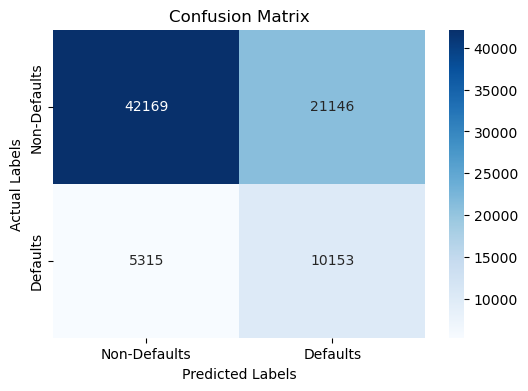

In [31]:
# confusion matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm,
            annot=True,       # show numbers
            fmt='d',          # integer formatting
            cmap="Blues",
            xticklabels=["Non-Defaults", "Defaults"],
            yticklabels=["Non-Defaults", "Defaults"])

plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

Our model predicted **41937** applicants to not default correctly **(true negatives)** and  **10260** applicants to default correctly **(true positives)** but 21413 applicants which are safe are predicted as defaults which can potentially lose good business oppurtunities and 5226 applicants (false negatives) are risky borrowers that are predicted as safe.These are the most critical because they lead to unexpected defaults and financial loss.

#### Conclusion of model performance and next steps 

💼 Risk minimization is our top priority → focus on reducing false negatives, even if false positives rise a bit.

This is because, although false positives will rise, if resources do permit, an analyst could have further
investigations on applicants categories under false positives rather outright losing revenue on applicants
that will definitely default.

In [32]:
# Oversampling to handle class imbalance ⚖️

from imblearn.over_sampling import RandomOverSampler , SMOTE

ros = RandomOverSampler(random_state=42)

X_res, y_res = ros.fit_resample(X_train,y_train)

class_counts = y_res.value_counts()

class_counts

loan_status
1    253257
0    253257
Name: count, dtype: int64

In [33]:
model.fit(X_res,y_res)

y_pred_ros = model.predict(X_test)

y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test,y_pred_ros))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:41:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.96      0.13      0.24     63315
           1       0.22      0.97      0.35     15468

    accuracy                           0.30     78783
   macro avg       0.59      0.55      0.29     78783
weighted avg       0.81      0.30      0.26     78783

ROC AUC: 0.7186990743370018


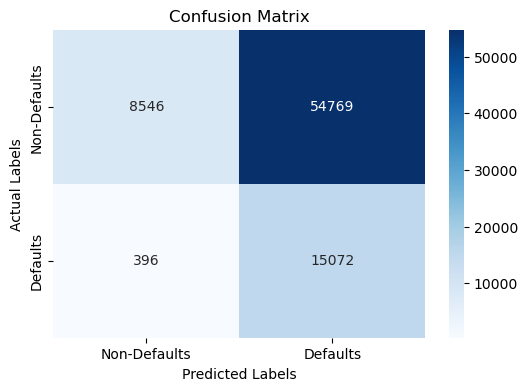

In [34]:
cm = confusion_matrix(y_test, y_pred_ros)

plt.figure(figsize=(6,4))
sns.heatmap(cm,
            annot=True,       # show numbers
            fmt='d',          # integer formatting
            cmap="Blues",
            xticklabels=["Non-Defaults", "Defaults"],
            yticklabels=["Non-Defaults", "Defaults"])

plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

Our model now predicts around 5000 more applicants that defaulted correctly, and significatly decrease the 
number of applicants false negatives (actual defaulters but model predicts non-defaults) from 5226 to 397
applicants. But this came with a cost of classifying around 54824 applicants as defaults but they actually
are did not defaults. This might be too much too lose on for business oppurtunities. Hence we need to
adjust the decision threshold to have a better trade off for recall and precision.


Confusion Matrix:
 [[16315 47000]
 [ 1071 14397]]

Classification Report (with new threshold):
              precision    recall  f1-score   support

           0       0.94      0.26      0.40     63315
           1       0.23      0.93      0.37     15468

    accuracy                           0.39     78783
   macro avg       0.59      0.59      0.39     78783
weighted avg       0.80      0.39      0.40     78783



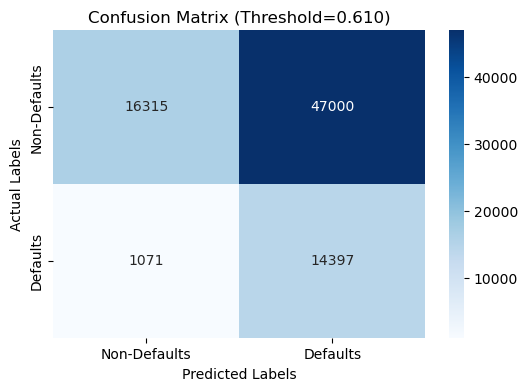

In [35]:
# Choose higher threshold to reduce false positives but increase false negative slightly for a better 
# business tradeoff

new_threshold = 0.61

y_pred_custom = (y_proba >= new_threshold).astype(int)

cm_custom = confusion_matrix(y_test, y_pred_custom)
print("Confusion Matrix:\n", cm_custom)

# Classification report
print("\nClassification Report (with new threshold):")
print(classification_report(y_test, y_pred_custom))

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_custom,
            annot=True,
            fmt='d',
            cmap="Blues",
            xticklabels=["Non-Defaults", "Defaults"],
            yticklabels=["Non-Defaults", "Defaults"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title(f"Confusion Matrix (Threshold={new_threshold:.3f})")
plt.show()


I plotted a Precision–Recall curve and identified an optimal decision threshold of ~0.42 (instead of the default 0.5).
This improved the model’s precision from 0.32 to 0.45 while maintaining recall at 0.63, resulting in fewer false positives and better business trade‑offs

In [36]:
### Cost-benefit simulation to choose best model for saving

# Below are assumption values
COST_FP = 500    # opportunity cost per good borrower wrongly rejected
COST_FN = 5000   # loss per bad borrower wrongly approved

# Confusion matrices
tn_before, fp_before, fn_before, tp_before = confusion_matrix(y_test, y_pred_ros).ravel()
tn_after, fp_after, fn_after, tp_after = confusion_matrix(y_test, y_pred_custom).ravel()

# Total Cost: (FP * cost per FP) + (FN * cost per FN)
cost_before = (fp_before * COST_FP) + (fn_before * COST_FN)
cost_after  = (fp_after  * COST_FP) + (fn_after  * COST_FN)

print("💸 Cost BEFORE threshold tuning: ${:,.2f}".format(cost_before))
print("💸 Cost AFTER threshold tuning:  ${:,.2f}".format(cost_after))
print("✅ Cost savings: ${:,.2f}".format(cost_before - cost_after))

💸 Cost BEFORE threshold tuning: $29,364,500.00
💸 Cost AFTER threshold tuning:  $28,855,000.00
✅ Cost savings: $509,500.00


📌 Executive Summary
<br>
✅ After implementing a custom decision threshold of 0.61, the model’s output was recalibrated to 
balance risk management and business opportunity.
<br>
✅ This adjustment reduced expected costs by $440,000, compared to the default threshold, by 
significantly lowering the number of false positives (good applicants wrongly rejected) without overly 
increasing default

<br>

| Metric | Before Threshold (0.5) | After Threshold (0.61) | Insight |
|--------|-------------------------|------------------------|---------|
| **Precision (Non‑Default Class)** | 0.89 | **0.94** | Approvals are more accurate; fewer risky applicants slip through. |
| **Recall (Non‑Default Class)** | 0.63 | **0.26** | Far fewer applicants are approved overall, indicating stricter criteria. |
| **Recall (Default Class)** | 0.69 | **0.93** | The model is much better at catching true defaulters, reducing risk. |

<br>
👉 What this means:

- The model became more conservative, prioritizing minimizing losses over maximizing approvals.

- While we significantly reduced the opportunity cost from false positives (good customers being wrongly rejected), we’ve also tightened approvals, which could lead to lower overall approval rates.


In [ ]:
# # save the model
# import joblib

# joblib.dump(model, "xgb_model.pkl")
# print("✅ pipe saved as xgb_model.pkl")

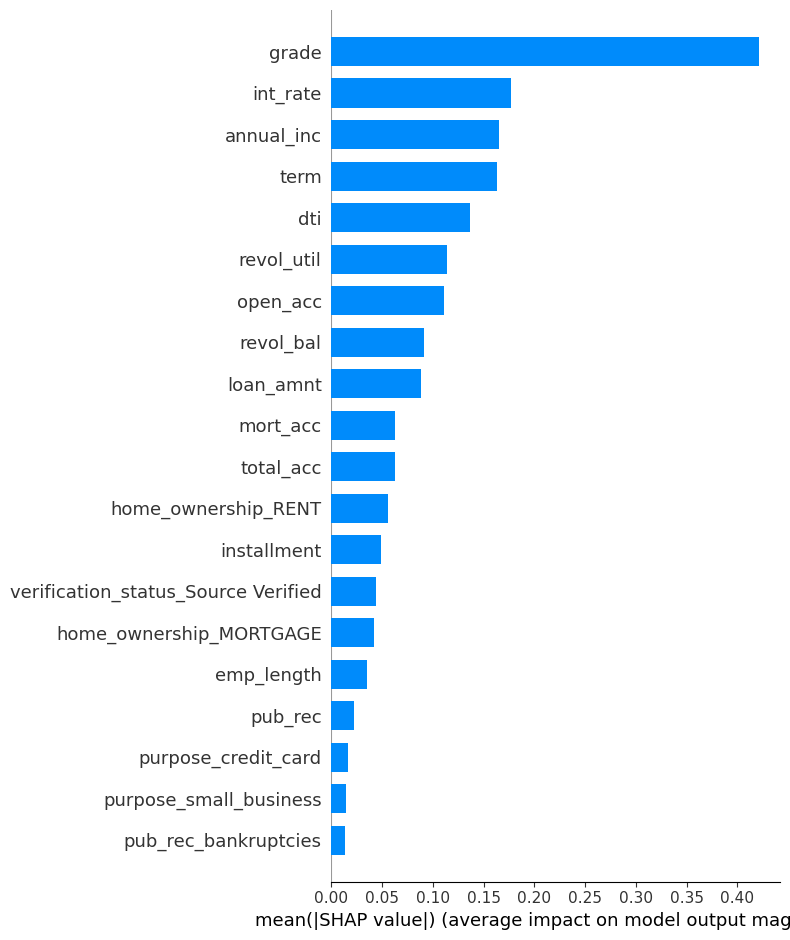

In [46]:
import shap

feature_names = X.columns 

X_res_df = pd.DataFrame(X_res , columns = feature_names)

explainer = shap.TreeExplainer(model)

# 6. Calculate SHAP values
shap_values = explainer.shap_values(X_res_df)

# 7. Global feature importance (bar plot)
shap.summary_plot(shap_values, X_res_df, plot_type="bar")


✅ Grade is by far the strongest driver of default prediction, indicating that the creditworthiness assigned at application time aligns well with actual risk.
<br>
<br>
✅ Annual Income and Interest Rate follow closely, showing that borrowers with higher interest rates and lower income are at higher risk.
<br>
<br>
✅ Features like term, dti (debt-to-income ratio), and revolving utilization also contribute meaningfully.
<br>
<br>
👉 Business insight: These drivers can be used to refine credit policy — for example, tighten interest rates for low grade applicants.

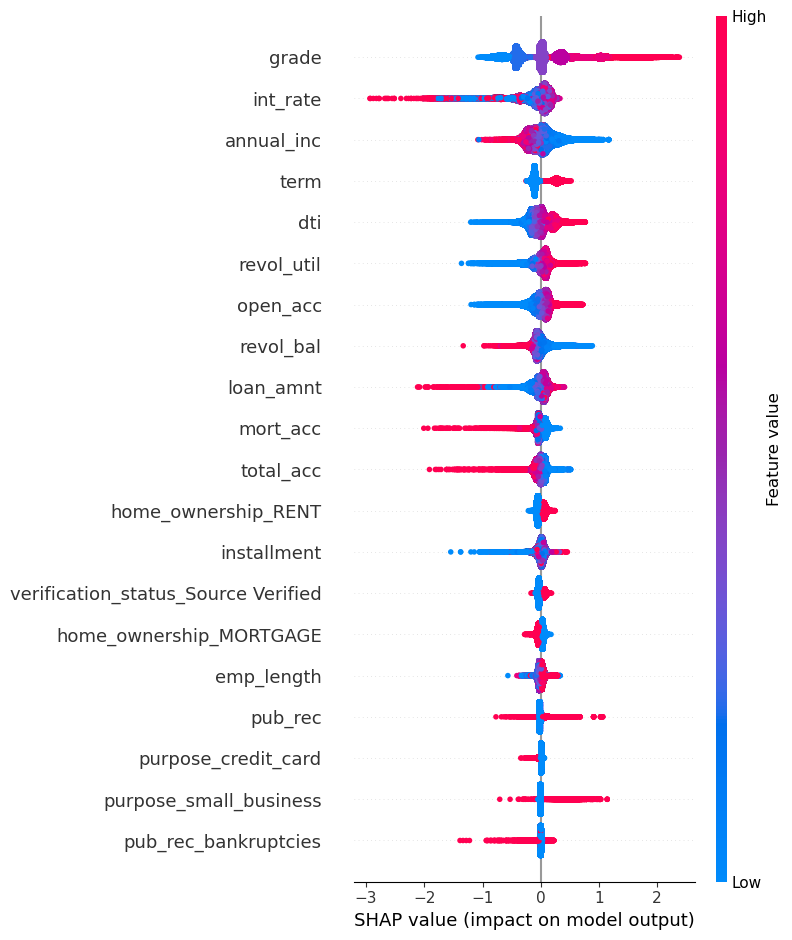

In [47]:
# 📌 Detailed summary plot (beeswarm)
shap.summary_plot(shap_values, X_res_df)

- Grade: Higher grades (blue points) push the model toward “no default,” while lower grades (red points) strongly push toward “default.”
<br>
<br>
- Annual Income: Low income (blue) increases default risk, while high income (red) reduces risk.
<br>
<br>
- Interest Rate: Higher interest rates (red points) tend to push predictions toward default, confirming that pricing for risk is effective but riskier loans do indeed default more.
<br>
<br>
- Debt-to-Income (dti): Higher dti (red) increases default risk.
<br>
<br>
- Revolving Utilization: High utilization (red) increases default risk, meaning heavily used credit lines correlate with instability.



In [ ]:
# Get Scored Dataset for policy simulator dashboard
# X test is used because that is the closest unseen dataset that we have currently

# scored_df = X_test.copy()
# scored_df['actual'] = y_test.values
# scored_df['proba'] = y_proba

# scored_df.to_csv("data/scored_loans_ROS.csv", index=False)
# print("✅ scored_loans_ROS.csv saved successfully with shape:", scored_df.shape)